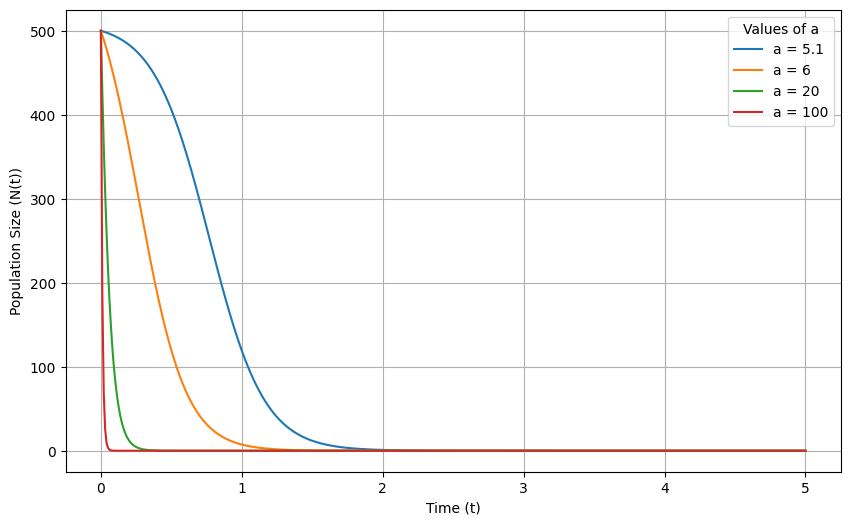

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
b = 0.01  # Given constant
N0 = 500  # Initial population size
t_values = np.linspace(0, 5, 500)  # Time range for plotting

# Define a list of 'a' values to explore (some just over 5 and some significantly larger)
a_values = [5.1, 6, 20, 100]

# Define the solution function N(t) based on the derived formula
def N_t(t, a, b, N0):
    return (a * N0) / (N0 * b - (N0 * b - a) * np.exp(a * t))

# Plot the solution for each value of 'a'
plt.figure(figsize=(10, 6))
for a in a_values:
    N_t_values = N_t(t_values, a, b, N0)
    plt.plot(t_values, N_t_values, label=f'a = {a}')

# Add labels and legend
plt.xlabel("Time (t)")
plt.ylabel("Population Size (N(t))")
plt.legend(title="Values of a")
plt.grid(True)
plt.show()


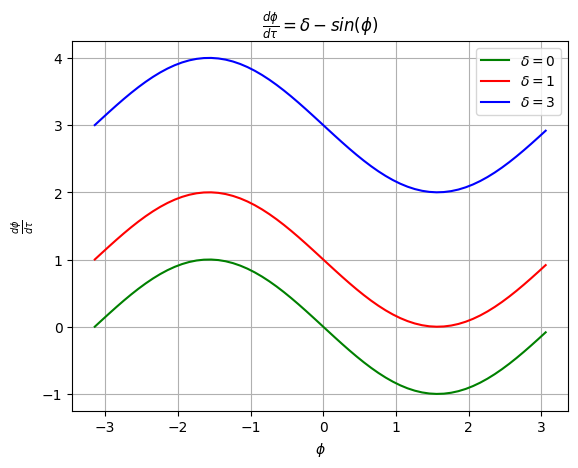

In [20]:
# importing modules 
import numpy 
from matplotlib import pyplot  
   
# assigning time values of the signal 
# initial time period, final time period and phase angle 
signalTime = numpy.arange(-np.pi, np.pi, 0.1); 
  
# getting the amplitude of the signal 
signalAmplitude_0 = 0 - numpy.sin(signalTime) 

signalAmplitude_1 = 1 - numpy.sin(signalTime) 

signalAmplitude_2 = 3 - numpy.sin(signalTime) 
# plotting the signal
pyplot.title(r'$\frac{d\phi}{d\tau}=\delta-sin(\phi)$') 
pyplot.xlabel(r'$\phi$') 
pyplot.ylabel(r'$\frac{d\phi}{d\tau}$')

pyplot.plot(signalTime, signalAmplitude_0, color ='green', label="$\delta=0$")
pyplot.plot(signalTime, signalAmplitude_1, color ='red', label="$\delta=1$")
pyplot.plot(signalTime, signalAmplitude_2, color ='blue', label="$\delta=3$")
pyplot.grid(True)
pyplot.legend()

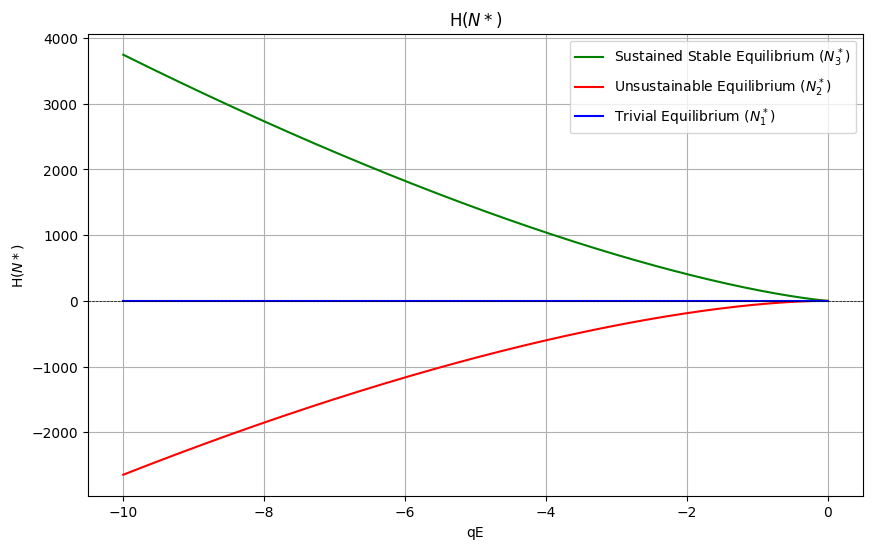

In [58]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Define parameters
r = 0.1  # intrinsic growth rate
Nc = 10  # critical population
K = 100  # carrying capacity

def func_1(qE):
    term1 = -(K + Nc) / 2
    term2 = -(Nc * K) / (2*r) * np.sqrt(((r * (K + Nc)) / (Nc * K))**2 - (4 * (-r / (Nc * K)) * (-r - qE)))
    return (term1 + term2) * qE

# Generate qE values
qE_values = np.linspace(-10, 0, 500)

def func_2(qE):
    term1 = -(K + Nc) / 2
    term2 = (Nc * K) / (2*r) * np.sqrt(((r * (K + Nc)) / (Nc * K))**2 - (4 * (-r / (Nc * K)) * (-r - qE)))
    return (term1 + term2) * qE

# Compute the corresponding values of the function
y_values_1 = func_1(qE_values)
y_values_2 = func_2(qE_values)
N_stable_triv=0 * qE_values
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(qE_values, y_values_1, label='Sustained Stable Equilibrium ($N^*_3$)', color='green')
plt.plot(qE_values, y_values_2, label='Unsustainable Equilibrium $(N^*_2)$', color='red')
plt.plot(qE_values, N_stable_triv, label='Trivial Equilibrium $(N^*_1)$', color='blue')
plt.title('H($N*$)')
plt.xlabel('qE')
plt.ylabel('H($N*$)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()


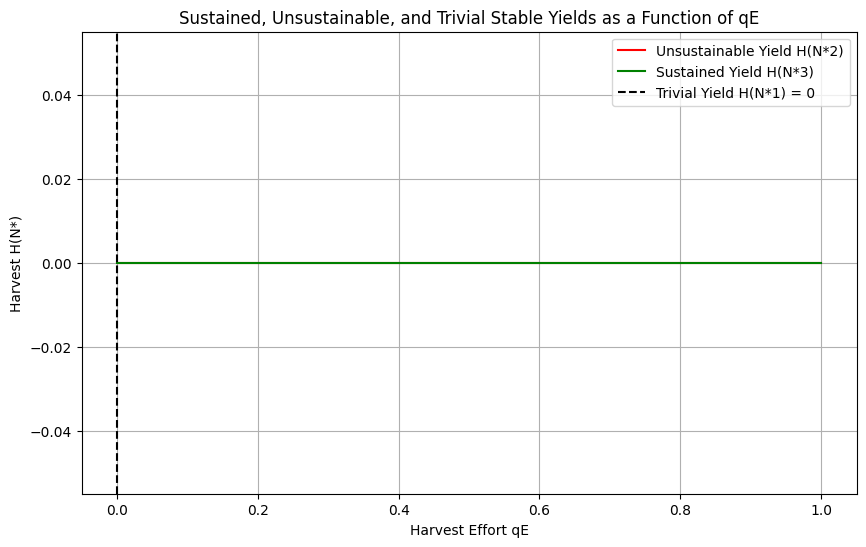

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Constants
r = 0.5  # Intrinsic growth rate
Nc = 10  # Critical population
K = 100  # Carrying capacity

# Function F(N) = rN * ((N / Nc) - 1) * (1 - N / K)
def F(N, r, Nc, K):
    return r * N * ((N / Nc) - 1) * (1 - N / K)

# Function H(N) = qE * N
def H(N, qE):
    return qE * N

# Finding equilibrium points by solving F(N) - H(N) = 0
def find_equilibrium(qE, r, Nc, K):
    # Define the equation F(N) - H(N) = 0
    def equation(N):
        return F(N, r, Nc, K) - H(N, qE)
    
    # Guess for the roots
    initial_guesses = [0, 0.5 * K, K]
    roots = []
    for guess in initial_guesses:
        root = fsolve(equation, guess)[0]
        if root > 0 and root < K:  # Only consider positive populations less than K
            roots.append(root)
    return sorted(set(roots))  # Remove duplicates

# Values of qE for plotting
qE_values = np.linspace(0, 1, 100)

# Initialize lists to store equilibrium points
N_star_1 = []
N_star_2 = []
N_star_3 = []
H_star_2 = []
H_star_3 = []

# Calculate equilibrium points for each qE
for qE in qE_values:
    eq_points = find_equilibrium(qE, r, Nc, K)
    if len(eq_points) == 3:
        N_star_1.append(eq_points[0])
        N_star_2.append(eq_points[1])
        N_star_3.append(eq_points[2])
        H_star_2.append(H(eq_points[1], qE))
        H_star_3.append(H(eq_points[2], qE))
    else:
        N_star_1.append(eq_points[0])
        N_star_2.append(0)
        N_star_3.append(0)
        H_star_2.append(0)
        H_star_3.append(0)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(qE_values, H_star_2, label='Unsustainable Yield H(N*2)', color='r')
plt.plot(qE_values, H_star_3, label='Sustained Yield H(N*3)', color='g')
plt.axvline(x=0, color='k', linestyle='--', label='Trivial Yield H(N*1) = 0')
plt.xlabel('Harvest Effort qE')
plt.ylabel('Harvest H(N*)')
plt.title('Sustained, Unsustainable, and Trivial Stable Yields as a Function of qE')
plt.legend()
plt.grid(True)
plt.show()
